In [5]:
cd /Users/martin/Git/estates/src

/Users/martin/Git/estates/src


In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import power_transform
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

from data import make_rentals, preprocess_rentals 
from features import build_features

In [85]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [56]:
df = make_rentals('../data/silver')
df = preprocess_rentals(df)
df = build_features(df)

In [43]:
df.head()

,encoder__x0_brno-mesto,encoder__x0_ceske budejovice,encoder__x0_hradec kralove,encoder__x0_karvina,encoder__x0_olomouc,encoder__x0_ostatni,encoder__x0_ostrava-mesto,encoder__x0_pardubice,encoder__x0_plzen-mesto,encoder__x0_praha 1,...,playground,area_m2,furnishing,elevator,efficiency,floor,price,num_pois,rooms,overall_quality
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,30.0,0.0,1.0,7.0,3.0,11200.0,0.0,1.0,9.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,55.0,0.0,0.0,5.0,3.0,7950.0,13.0,2.0,7.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,28.0,0.0,0.0,5.0,2.0,3450.0,12.0,1.0,5.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,56.0,0.0,0.0,5.0,4.0,6000.0,15.0,2.0,5.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,350.0,0.0,0.0,7.0,2.0,90000.0,0.0,5.0,8.0


In [91]:
df.loc[df.train ==1]

,encoder__x0_brno-mesto,encoder__x0_ceske budejovice,encoder__x0_hradec kralove,encoder__x0_karvina,encoder__x0_olomouc,encoder__x0_ostatni,encoder__x0_ostrava-mesto,encoder__x0_pardubice,encoder__x0_plzen-mesto,encoder__x0_praha 1,...,area_m2,furnishing,elevator,efficiency,floor,price,num_pois,rooms,overall_quality,prague
2,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,28.00,0.00,0.00,5.00,2.00,3450.00,12.00,1.00,5.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,102.00,0.00,0.00,7.00,4.00,9900.00,16.00,3.00,9.00,0.00
55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,71.00,1.00,1.00,4.00,3.00,20500.00,14.00,3.00,9.00,1.00
56,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,44.00,1.00,0.00,7.00,2.00,9000.00,12.00,2.00,7.00,0.00
66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,50.00,0.00,0.00,7.00,-1.00,8600.00,15.00,2.00,7.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12792,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,36.00,0.00,1.00,4.00,5.00,6500.00,15.00,1.00,9.00,0.00
12797,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,36.00,1.00,0.00,7.00,2.00,10500.00,17.00,2.00,7.00,0.00
12799,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,30.00,0.00,0.00,7.00,2.00,9000.00,17.00,2.00,7.00,0.00
12805,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,40.00,0.00,0.00,7.00,2.00,7500.00,15.00,2.00,5.00,0.00


In [88]:
df.columns

Index(['encoder__x0_brno-mesto', 'encoder__x0_ceske budejovice',
       'encoder__x0_hradec kralove', 'encoder__x0_karvina',
       'encoder__x0_olomouc', 'encoder__x0_ostatni',
       'encoder__x0_ostrava-mesto', 'encoder__x0_pardubice',
       'encoder__x0_plzen-mesto', 'encoder__x0_praha 1',
       'encoder__x0_praha 10', 'encoder__x0_praha 2', 'encoder__x0_praha 3',
       'encoder__x0_praha 4', 'encoder__x0_praha 5', 'encoder__x0_praha 6',
       'encoder__x0_praha 7', 'encoder__x0_praha 8', 'encoder__x0_praha 9',
       'encoder__x1_1+1', 'encoder__x1_1+kk', 'encoder__x1_2+1',
       'encoder__x1_2+kk', 'encoder__x1_3+1', 'encoder__x1_3+kk',
       'encoder__x1_4+1', 'encoder__x1_4+kk', 'encoder__x1_5+1',
       'encoder__x1_5+kk', 'encoder__x1_6 a vice', 'encoder__x1_atypicky',
       'encoder__x1_chalupa', 'encoder__x1_chata', 'encoder__x1_ostatni',
       'encoder__x1_rodinny', 'encoder__x1_vila', 'encoder__x2_flat',
       'encoder__x2_house', 'encoder__x3_Cihlová', 'encoder_

In [58]:
model = RandomForestRegressor(random_state=0)

In [59]:
X, y = df.drop('price', axis=1), np.log(df.price)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [60]:
scorer = make_scorer(mean_squared_error, squared=False)
score = cross_val_score(model, X, y, cv=3, scoring=scorer)

In [61]:
score.mean()

0.2619577472343316

In [63]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [70]:
y_pred = model.predict(X_test)

In [71]:
mean_squared_error(y_test, y_pred, squared=False)

0.25100676857130383

In [81]:
res = pd.DataFrame().assign(y_true = np.exp(y_test), y_pred=np.exp(y_pred), diff=np.abs(np.exp(y_test) - np.exp(y_pred)))

In [87]:
res.sort_values('diff',ascending=False).head(50)

,y_true,y_pred,diff
2406,100000.00,27173.25,72826.75
4250,94800.00,35633.27,59166.73
2330,110000.00,53986.42,56013.58
1096,150000.00,97359.10,52640.90
3998,165000.00,112705.49,52294.51
247,130000.00,84282.83,45717.17
1143,120000.00,80821.53,39178.47
9923,30000.00,67180.68,37180.68
7488,49800.00,14259.19,35540.81
2466,97000.00,62598.13,34401.87


# Results

In [50]:
import matplotlib.pyplot as plt
import numpy as np

In [44]:
model.fit(X, y)

RandomForestRegressor(random_state=0)

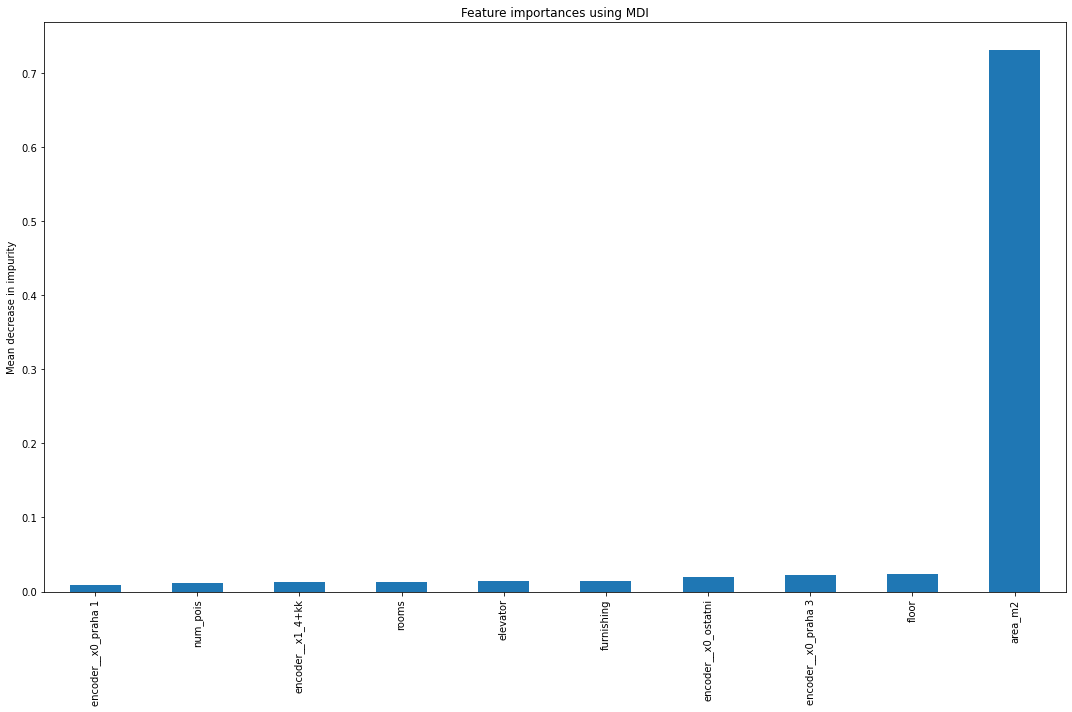

In [69]:
importances = sorted(zip(model.feature_importances_, X.columns), key=lambda x: x[0])[-10:]
cols = [col for _, col in importances]
importances = [importance for importance, _ in importances]

forest_importances = pd.Series(importances, index=cols)
fig, ax = plt.subplots(figsize=(15,10))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# param search



In [66]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [68]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [71]:
best_model = rf_random.best_estimator_
base_model = RandomForestRegressor(random_state=0)

In [76]:
best_model

RandomForestRegressor(max_depth=100, n_estimators=1400)

In [72]:
score = cross_val_score(best_model, X, y, cv=3, scoring=scorer)

In [73]:
base_score = score = cross_val_score(base_model, X, y, cv=3, scoring=scorer)

In [77]:
score

array([7641.79131163, 5302.81646409, 5128.52760849])

In [78]:
base_score

array([7641.79131163, 5302.81646409, 5128.52760849])